## **Import Necessary Libraries**

In [1]:
import numpy as np
from libsvm.svmutil import svm_save_model, svm_load_model, svm_predict
from liblinear.liblinearutil import save_model, load_model, predict
import time
import os
import matplotlib.pyplot as plt

## **Import Functions from train.py**

In [2]:
from train import get_data, spatial_frequency_feature_fusion, prepare_data, train_model, train_linear_model, visualize

## **Run this for preprocessing**

- must include /utils
- example path: "/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils"

In [3]:
import sys
# path of the folder "Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data"
sys.path.append("/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils")

from preprocessing_save import load_image, save_image

# directory for reading
img_real = "/Users/Danniel/Downloads/Datasets/Low Dataset/real"
img_gan = "/Users/Danniel/Downloads/Datasets/Low Dataset/gan"

# directory for saving (must be an empty folder)
save_dir_real = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_real"
save_dir_gan = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_gan"

# store the images
image_real = load_image(img_real)
image_gan = load_image(img_gan)

save_image(image_real, save_dir_real)
save_image(image_gan, save_dir_gan)



Image is already in 512x512



Applying Gaussian Noise Reduction

1 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

2 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

3 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

4 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

5 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

6 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

7 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

8 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

9 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

10 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

11 finished



Image is already in 512x512



Applying Gaussian Noise Reduction

12 finished



Image is already in 512x512



Appl

## **Provide directory for Preprocessed Real and GAN-Generated Images**

In [4]:
real_directory = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_real"
gan_directory = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_gan"

## *"get_data" function will load the preprocessed images from the directory and store it in a list*

In [5]:
# run data preparation
real_data = get_data(real_directory)
gan_data = get_data(gan_directory)

Preprocessed Images:  100
Preprocessed Images:  100


## *Run to perform the proposed "spatial frequency feature fusion" method to extract meaningful features of an image to classify whether it is GAN-Generated or Real. The feature vector of each image will be stored in "fused_features" list*

In [6]:
# run feature extraction & feature fusion
extracted_real = spatial_frequency_feature_fusion(real_data)
extracted_gan = spatial_frequency_feature_fusion(gan_data)

Performing Feature Extraction
Applying Local Binary Pattern



[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0  30  50 ... 251 249   0]
 [  0  30  56 ... 249  56   0]
 [  0   0   0 ...   0   0   0]]

1 out of 100 images
Percentage: 1.0




[[  0   0   0 ...   0   0   0]
 [  0 224 227 ... 243 255   0]
 [  0 227 195 ... 235 201   0]
 ...
 [  0 252 124 ... 121 248   0]
 [  0 120 252 ...  56 120   0]
 [  0   0   0 ...   0   0   0]]

2 out of 100 images
Percentage: 2.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 251   0]
 [  0 255 239 ... 255 255   0]
 ...
 [  0 128 134 ... 135 207   0]
 [  0 135 199 ... 199 255   0]
 [  0   0   0 ...   0   0   0]]

3 out of 100 images
Percentage: 3.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 239 207   0]
 [  0 255 124 ... 199 255   0]
 ...
 [  0 255 255 ... 131 255   0]
 [  0 249 236 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]

4 out of 100 images
Percentage: 4.0




[[  0

## **For Data Visualization**
- provide real and gan parameter

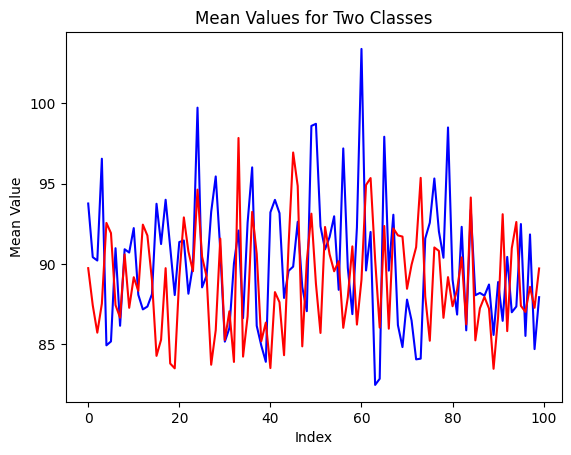

([93.76486015319824,
  90.42439270019531,
  90.21597862243652,
  96.55365943908691,
  84.93636703491211,
  85.17818832397461,
  90.98285102844238,
  86.15398788452148,
  90.91703033447266,
  90.71243095397949,
  92.23371124267578,
  88.08440017700195,
  87.17208862304688,
  87.35133171081543,
  88.11944961547852,
  93.74908638000488,
  91.24160385131836,
  93.9985523223877,
  91.05903053283691,
  88.06630516052246,
  91.36682891845703,
  91.46381568908691,
  88.14871597290039,
  89.9283275604248,
  99.73212432861328,
  88.54463958740234,
  89.27888870239258,
  93.23738098144531,
  95.45002174377441,
  90.8724365234375,
  85.16546249389648,
  86.00954627990723,
  90.03616142272949,
  92.08411598205566,
  86.63264083862305,
  92.57834243774414,
  96.0146312713623,
  86.15224266052246,
  84.92535591125488,
  83.91093635559082,
  93.21469116210938,
  93.99202156066895,
  93.16333961486816,
  87.8865909576416,
  89.57538986206055,
  89.8358325958252,
  92.62715148925781,
  88.56329345703125

In [7]:
# visualize
visualize(extracted_real, extracted_gan)

## **Data Preparation before feeding to the classifier**
- assigning of labels
- flattening of feature vector

In [8]:
# prepare the data
labels, datasets = prepare_data(extracted_real, extracted_gan)
print(labels, datasets)

----------------------------Preparing the Data-------------------------------

Labels:  200
Datasets:  200
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 0,  0,  0, ..., 97, 32,  0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 0,  0,  0, ..., 95, 32,  0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 

## **Run this cell if you want to store the data in txt**
- it can be useful for storing training data to avoid repetition of process

**Suggested format**
- train_labels.txt
- train_features.txt
   

In [12]:
# Save the data
np.savetxt("/Users/Danniel/Downloads/Datasets/Text File Data/train_labels_faces_orig.txt", labels)
np.savetxt("/Users/Danniel/Downloads/Datasets/Text File Data/train_features_faces_orig.txt", datasets)

**Load the data**

In [3]:
# Load the data
loaded_labels = np.loadtxt("/Users/Danniel/Downloads/Datasets/Text File Data/train_labels_animals.txt")
loaded_features = np.loadtxt("/Users/Danniel/Downloads/Datasets/Text File Data/train_features_animals.txt")

print("Labels: ", len(loaded_labels))
print("Features: ", len(loaded_features))

Labels:  1400
Features:  1400


## **Model Training**
- LibSVM
- Support Vector Machine
- Linear Kernel


***
    - change the parameter if the data are from loaded text file
    - train_model(loaded_labels, loaded_features)

In [ ]:
# train the data
model = train_model(labels, datasets, C=1)

## **Model Training**
- Liblinear


***
    - change the parameter if the data are from loaded text file
    - train_model(loaded_labels, loaded_features)

In [4]:
# train the data
model = train_linear_model(loaded_labels, loaded_features, C=1)

----------------------Model Training in Liblinear--------------------------

Cross Validation Accuracy = 99.9286%
99.92857142857143


## **Run this when you train the model in liblinear**

In [6]:
import pickle
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

clf = LinearSVC(loss='hinge', C=1)

model = clf.fit(loaded_features, loaded_labels)

platt = CalibratedClassifierCV(clf, method='sigmoid')
prob_estimates = platt.fit(loaded_features, loaded_labels)

# change the filename with directory
with open('/Users/Danniel/Downloads/Model/platt_scale.pkl', 'wb') as model_file:
    pickle.dump(prob_estimates, model_file)

## **Save the model using ".model" extension**

In [5]:
# save the model
model_file = "/Users/Danniel/Downloads/Model/Validate/animals_liblinear.model"
save_model(model_file, model)

## **Load the model***
- use "load_model" if model is trained in liblinear
- use "svm_load_model" if model is trained in libsvm

In [ ]:
model_file = svm_load_model("/Users/User/Desktop/model/updatedobjects_new.model")

## **Model Testing**
- provide directory (folder) for testing datasets

## *Testing Combined GAN and Real Images*
- use "predict" if model is trained in liblinear
- use "svm_predict" if model is trained in libsvm

In [ ]:
from preprocessing import preprocessing
import os
import numpy as np
from train import spatial_frequency_feature_fusion

# test the model
def get_test_data(directory):
    images = []

    # load the images and store in images list
    for filename in os.listdir(directory):
        image = os.path.join(directory, filename)
        if image is not None:
            images.append(image)

    # preprocessing
    preprocessed_img = []
    for i in images:
        preprocessed_img.append(preprocessing(i))   

    # flatten the feature vector
    fused_features = spatial_frequency_feature_fusion(preprocessed_img)
    labels = np.ones((len(fused_features), 1)) 
    true_label = labels.reshape(labels.shape[0])

    feature_vector = []
    for i in fused_features:
        print(i)
        feature_vector.append(i.flatten())


    return feature_vector


def prepare_test_data(real, gan):
    print("\n\n-------------------PREPARING TEST DATA----------------------------\n")
    #label real  and gan datasets
    real_label = np.ones((len(real), 1))
    gan_label = np.zeros((len(gan), 1))

    # combine the labels and datasets
    dataset_labels = np.vstack((real_label, gan_label))
    datasets = np.vstack((real, gan))

    feature_vector = [i.flatten() for i in datasets]
    true_label = dataset_labels.reshape(dataset_labels.shape[0])

    return feature_vector, true_label


def predict(feature_vector, true_label, model):  
    # predict the result
    print("\n\n-------------------THE MODEL IS PREDICTING----------------------------\n")
    predicted_labels, _, likelihood = svm_predict(true_label, feature_vector, model, '-b 1')


    print("------------------------------------------RESULT-----------------------------------\n")
    result = []
    for i in predicted_labels:
        if i == 1.0:
            result.append("Real")
        elif i == 0.0:
            result.append("GAN")

    
    print(predicted_labels)
    print(result)



while True:
    option = input("Does your data came from text file? (y/n)")

    if option.lower() == "y":
        # mode prediction
        predict(loaded_features, loaded_labels, model_file)
        break

    elif option.lower() == "n":           
        #provide directory for testing dataset
        dir_real = "/Users/User/Desktop/real test/real test objects"
        dir_gan = "/Users/User/Desktop/gan test/gan test objects"

        # undergo spatial-frequency-feature fusion
        real = get_test_data(dir_real)
        gan = get_test_data(dir_gan)

        # combine the real and gan data
        features, labels = prepare_test_data(real, gan)

        # model prediction
        predict(features, labels, model_file)
        break
    
    else:
        print("Invalid Input")

###########################################################################################################################################
# existing_model_file = "/Users/Danniel/Downloads/sample.model"
# existing_model = svm_load_model(existing_model_file)

# # New data
# new_labels = np.array(new_labels)
# new_datasets = np.array(new_datasets)

# # Train or update the model incrementally
# updated_model = train_model(existing_model, new_labels, new_datasets)

# # Save the updated model
# model_file = "/Users/Danniel/Downloads/updated_model.model"
# svm_save_model(model_file, updated_model)

# # Use the updated model for prediction
# image_directory = "/Users/Danniel/Downloads/Low Dataset/test"
# images = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
# predict(updated_model, images)
########################################################################################################################################

## *Testing One Class of Image only*
- use "predict" if model is trained in liblinear
- use "svm_predict" if model is trained in libsvm

In [ ]:
from preprocessing import preprocessing
import os
import numpy as np
from train import spatial_frequency_feature_fusion

# test the model
def get_test_data(directory):
    images = []

    # load the images and store in images list
    for filename in os.listdir(directory):
        image = os.path.join(directory, filename)
        if image is not None:
            images.append(image)

    # preprocessing
    preprocessed_img = []
    for i in images:
        preprocessed_img.append(preprocessing(i))   

    # flatten the feature vector
    fused_features = spatial_frequency_feature_fusion(preprocessed_img)
    labels = np.ones((len(fused_features), 1)) 
    true_label = labels.reshape(labels.shape[0])

    feature_vector = []
    for i in fused_features:
        print(i)
        feature_vector.append(i.flatten())


    return feature_vector


def prepare_test_data(gan):
    print("\n\n-------------------PREPARING TEST DATA----------------------------\n")
    #label real  and gan datasets
    #real_label = np.ones((len(real), 1))
    gan_label = np.zeros((len(gan), 1))

    # combine the labels and datasets
    #dataset_labels = np.vstack((real_label, gan_label))
    #datasets = np.vstack((real, gan))

    feature_vector = [i.flatten() for i in gan]
    true_label = gan_label.reshape(gan_label.shape[0])

    return feature_vector, true_label


def predict(feature_vector, true_label, model):  
    # predict the result
    print("\n\n-------------------THE MODEL IS PREDICTING----------------------------\n")
    predicted_labels, _, likelihood = svm_predict(true_label, feature_vector, model, '-b 1')


    print("------------------------------------------RESULT-----------------------------------\n")
    result = []
    for i in predicted_labels:
        if i == 1.0:
            result.append("Real")
        elif i == 0.0:
            result.append("GAN")

    
    print(predicted_labels)
    print(result)



while True:
    option = input("Does your data came from text file? (y/n)")

    if option.lower() == "y":
        # mode prediction
        predict(loaded_features, loaded_labels, model_file)
        break

    elif option.lower() == "n":           
        #provide directory for testing dataset
        #dir_real = "/Users/User/Desktop/real test/real test objects"
        dir_gan = "/Users/User/Desktop/gan test/gan test objects"

        # undergo spatial-frequency-feature fusion
        #real = get_test_data(dir_real)
        gan = get_test_data(dir_gan)

        # combine the real and gan data
        features, labels = prepare_test_data(gan)

        # model prediction
        predict(features, labels, model_file)
        break
    
    else:
        print("Invalid Input")

###########################################################################################################################################
# existing_model_file = "/Users/Danniel/Downloads/sample.model"
# existing_model = svm_load_model(existing_model_file)

# # New data
# new_labels = np.array(new_labels)
# new_datasets = np.array(new_datasets)

# # Train or update the model incrementally
# updated_model = train_model(existing_model, new_labels, new_datasets)

# # Save the updated model
# model_file = "/Users/Danniel/Downloads/updated_model.model"
# svm_save_model(model_file, updated_model)

# # Use the updated model for prediction
# image_directory = "/Users/Danniel/Downloads/Low Dataset/test"
# images = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
# predict(updated_model, images)
########################################################################################################################################

## **Store the test data in txt file**

In [ ]:
# Save the data
np.savetxt("/Users/User/Desktop/txtfiles/test_labels.txt", labels)
np.savetxt("/Users/User/Desktop/txtfiles/test_features.txt", features)